# Titanic: Machine Learning from Disaster

Problem overview from [Kaggle](https://www.kaggle.com/c/titanic/overview).

Problem datasets from [GitHub](https://github.com/keivanipchihagh/Intro_to_DataScience/tree/main/Titanic%20Machine%20Learning%20from%20Disaster/Datasets)

Problem notebook & solution from [Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

## Import Tools

In [1]:
# Data analysis library
import pandas as pd

# Data manipulation library
import numpy as np

# Data visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Save
from google.colab import files

# Deep learnig library
import keras

# Random Tree Library
from sklearn.ensemble import RandomForestClassifier

## Data Analysis & Data manipulation

### Load datasets

In [2]:
# Training data
train_data = pd.read_csv('https://raw.githubusercontent.com/keivanipchihagh/Intro_to_DS_and_ML/master/Deep%20Learning%20Problems/Titanic%20Machine%20Learning%20from%20Disaster%20-%20Kaggle/Raw%20Datasets/train.csv')

# Test data
test_data = pd.read_csv('https://raw.githubusercontent.com/keivanipchihagh/Intro_to_DS_and_ML/master/Deep%20Learning%20Problems/Titanic%20Machine%20Learning%20from%20Disaster%20-%20Kaggle/Raw%20Datasets/test.csv')

### Getting to know the dataset

In [3]:
train_data.info()
# train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Age

Is column 'Age' a factor in how many souls survived? **Clearly**

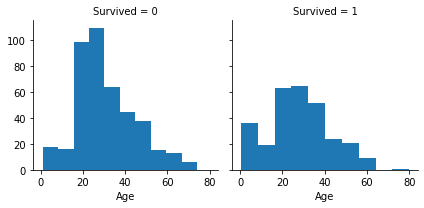

In [4]:
graph = sns.FacetGrid(data = train_data, col = 'Survived')
graph.map(plt.hist, 'Age')

Column 'Age' contains **891** values for the train data, from which **19.82%** are *NULL* values.

In [5]:
print('Number of entries for "Age" in train data:', len(train_data['Age']))
print('Number of NULL entries for "Age" in train data:', len(train_data[train_data['Age'].isnull()]), end = '\n' * 2)

print('Number of entries for AGE in test data is:', len(test_data['Age']))
print('Number of NULL entries for "Age" in test data:', len(test_data[test_data['Age'].isnull()]))

Number of entries for "Age" in train data: 891
Number of NULL entries for "Age" in train data: 177

Number of entries for AGE in test data is: 418
Number of NULL entries for "Age" in test data: 86


Filling the *NULL* values with column's **mean** is likely to solve the problem

In [6]:
def fix_Age(dataset):
  mean = dataset['Age'].mean() # Get the mean
  dataset['Age'].fillna(value = mean, inplace = True) # Fill NAs inplace

  dataset['AgeBand'] = pd.cut(dataset['Age'], 5)

  # Covert to categorical
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age']

  dataset['Age'] = dataset['Age'].astype(int)

  # Drop column
  dataset.drop(columns = ['AgeBand'], inplace = True)

In [7]:
fix_Age(train_data)  # Fix train data
fix_Age(test_data)   # Fix test data

Now let's convert the numerical 'Age' column into a categorical

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S


### Sex

Is column 'Sex' relavant to the number of souls survived? **Yes**, females are likely to have survived

In [9]:
train_data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = True)

# Visualization
# graph = sns.FacetGrid(data = train_data, col = 'Sex')
# graph.map(plt.hist, 'Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


Column 'Sex' does not contain any *NULLs*, however it must be feature engineered to satisfy the model.

In [10]:
def fix_Sex(dataset):
  dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int) # Map

In [11]:
fix_Sex(train_data)
fix_Sex(test_data)

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S


### PassengerId

Is 'PassengerId' a factor indicating how many souls survived? **Nope**

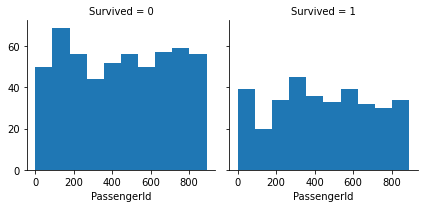

In [13]:
graph = sns.FacetGrid(data = train_data, col = 'Survived')
graph.map(plt.hist, 'PassengerId')

Simply enough, we can remove the column from our dataset

In [14]:
def fix_PassengerId(dataset):
  dataset.drop(columns = ['PassengerId'], inplace = True)

In [15]:
fix_PassengerId(train_data)

# Save PassengerIds for future reference
test_data_PassengerId = test_data['PassengerId']
fix_PassengerId(test_data)

In [16]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S


### Pclass

Does column 'Pclass' impact the rate of survived souls? **Statistics show positive**

In [17]:
# train_data['Pclass'].unique()

train_data[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Pclass', ascending = True)

# Visualization
# graph = sns.FacetGrid(data = train_data, col = 'Survived')
# graph.map(plt.hist, 'Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Cabin

Does column 'Cabin' have any impact on survival rate? **Can't know**

In [18]:
train_data_Cabin_all_entries = len(train_data['Cabin'])
train_data_Cabin_null_entries = len(train_data[train_data['Cabin'].isnull()])

print('Number of entries in train data for "Cabin":', train_data_Cabin_all_entries)
print('Number of NULL entries in train data for "Cabin":', train_data_Cabin_null_entries)
print('Ratio: ', str(train_data_Cabin_null_entries / train_data_Cabin_all_entries * 100)[:4], '% of the enties are NULL!', sep = '', end = '\n' * 2)

test_data_Cabin_all_entries = len(test_data['Cabin'])
test_data_Cabin_null_entries = len(test_data[test_data['Cabin'].isnull()])

print('Number of entries in test data for "Cabin":', test_data_Cabin_all_entries)
print('Number of NULL entries in test data for "Cabin":', test_data_Cabin_null_entries)
print('Ratio: ', str(test_data_Cabin_null_entries / test_data_Cabin_all_entries * 100)[:4], '% of the enties are NULL!', sep = '')

Number of entries in train data for "Cabin": 891
Number of NULL entries in train data for "Cabin": 687
Ratio: 77.1% of the enties are NULL!

Number of entries in test data for "Cabin": 418
Number of NULL entries in test data for "Cabin": 327
Ratio: 78.2% of the enties are NULL!


Solution: Drop the column

In [19]:
def fix_Cabin(dataset):
  dataset.drop(columns = ['Cabin'], inplace = True)

In [20]:
fix_Cabin(train_data)
fix_Cabin(test_data)

In [21]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,S


### Ticket

Column 'Ticket' cannot be used due to its variaty of entries

In [22]:
print('There are', len(train_data['Ticket'].unique()), 'unique entries for the column "Ticket"')

There are 681 unique entries for the column "Ticket"


Solution: Column must be dropped

In [23]:
def fix_Ticket(dataset):
  dataset.drop(columns = ['Ticket'], inplace = True)

In [24]:
fix_Ticket(train_data)
fix_Ticket(test_data)

In [25]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S


### Embarked

Is column 'Embarked' effective on how many souls survive? **It is**

In [26]:
print('Unique entries for "Embarked":', train_data['Embarked'].unique())
print('NULL entries for "Embarked":', len(train_data[train_data['Embarked'].isnull()]))

train_data[['Survived', 'Embarked']].groupby('Embarked', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

Unique entries for "Embarked": ['S' 'C' 'Q' nan]
NULL entries for "Embarked": 2


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


We have 2 *NULL* entries for the column 'Embarked' which can be removed from the dataset. We aslo need to do a feature engieering for this column so it will satisfy the model

In [27]:
def fix_Embarked(dataset):
  dataset.dropna(axis = 0, subset = ['Embarked'], inplace = True)
  dataset['Embarked'] = dataset['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [28]:
fix_Embarked(train_data)
fix_Embarked(test_data)

In [29]:
print('Unique entries for "Embarked":', train_data['Embarked'].unique())
print('NULL entries for "Embarked":', len(train_data[train_data['Embarked'].isnull()]))

train_data.info()

Unique entries for "Embarked": [2 0 1]
NULL entries for "Embarked": 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    int64  
 4   Age       889 non-null    int64  
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 69.5+ KB


### SibSp & Parch

Does the columns 'SibSp' & 'parch' have impact on the number of souls survived? **They do**

In [30]:
train_data[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.343234
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [31]:
train_data[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


Note that instead of having the two columns seperatly, we can combine them and create a new column instead and call it: 'FamilySize'

Although 'FamilySize' is not directly related to survival rate, we will use this column further down the road

In [32]:
def fix_SibSp_Parch(dataset):
  # Create column
  dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1

  # Drop column
  dataset.drop(columns = ['SibSp', 'Parch'], inplace = True)

In [33]:
fix_SibSp_Parch(train_data)
fix_SibSp_Parch(test_data)

In [34]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,2,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,0,2
2,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,2,2
4,0,3,"Allen, Mr. William Henry",0,2,8.0500,2,1


Now we can analyse the impact of 'FamilySize' on the survival rate

In [35]:
train_data[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by = 'Survived', ascending = False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.300935
5,0.200000
6,0.136364
8,0.000000
11,0.000000


### Name

Column 'Name' is in-directly related to the survival rate when feature extraction is performed. We can do feature engineering and extract *Title* for each individual. After cleaning up the titles, we'll have to map them into numerical type. Finally dropping the 'Name' column

In [36]:
def fix_Name(dataset):
  # Title Extraction
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

  # Cleanig up
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

  # Check mis-spellings
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs')

  # Mapping
  dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

  # Drop
  dataset.drop(columns = ['Name'], inplace = True)

In [37]:
fix_Name(train_data)
fix_Name(test_data)

In [38]:
pd.crosstab(train_data['Title'], train_data['Sex'])
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,0,1,7.2500,2,2,1
1,1,1,1,2,71.2833,0,2,3
2,1,3,1,1,7.9250,2,1,2
3,1,1,1,2,53.1000,2,2,3
4,0,3,0,2,8.0500,2,1,1


### IsAlone

Does the fact that an individual is alone or not have an impact on his/her survival? **We'll see**

We will drop the 'FamilySize' since it does not have direct impact on survival rate

In [39]:
def fix_IsAlone(dataset):
  # Create column
  dataset['IsAlone'] = np.where(dataset['FamilySize'] == 1, 1, 0)

  # Drop 'FamilySize'
  dataset.drop(columns = ['FamilySize'], inplace = True)

In [40]:
fix_IsAlone(train_data)
fix_IsAlone(test_data)

In [41]:
train_data[['IsAlone', 'Survived']].groupby('IsAlone').mean().sort_values(by = 'Survived', ascending = False)
# train_data.head()

,Survived
IsAlone,
0,0.505650
1,0.300935


### Fare

First, we deal with the *NULL* values in the test data

In [42]:
mean = test_data['Fare'].mean()
test_data['Fare'].fillna(value = mean, inplace = True)

Now let's convert 'Fare' column into categorical

In [43]:
def fix_Fare(dataset):
  dataset['FareBand'] = pd.qcut(dataset['Fare'], 4)

  # Convert into categorical
  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)

  # Drop column
  dataset.drop(columns = ['FareBand'], inplace = True)

In [44]:
fix_Fare(train_data)
fix_Fare(test_data)

In [45]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,2,1,0
1,1,1,1,2,3,0,3,0
2,1,3,1,1,1,2,2,1
3,1,1,1,2,3,2,3,0
4,0,3,0,2,1,2,1,1


# Random Forests

In [47]:
# Initialize tree
random_forest = RandomForestClassifier(n_estimators = 100)

# Split data
train_labels = train_data['Survived']
train_data.drop(columns = ['Survived'], inplace = True)

# Train
random_forest.fit(train_data, train_labels)

# Predict
Y_pred = random_forest.predict(test_data)

# Evaluate
random_forest.score(train_data, train_labels)

# Aquire Accuracy
acc_random_forest = round(random_forest.score(train_data, train_labels) * 100, 2)

# Print Accuracy
print('Random Forest Solution Accuracy:,'acc_random_forest)

86.95
